In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qalma.model import build_spin_chain
from qalma.scalarprod import fetch_covar_scalar_product
from qalma.operators.states import GibbsProductDensityOperator
from qalma.evolution import qutip_me_solve
from qalma.evolution.maxent_evol import adaptative_projected_evolution, projected_evolution
from qalma.operators.states.meanfield import variational_quadratic_mfa
ZEEMAN = 1
BETA = .5

# Build a spin chain with a Heisenberg antiferromagnetic coupling:
SYSTEM = build_spin_chain(6)
# Observables
SX_locals = [SYSTEM.site_operator(f"Sx@{pos}") for pos in SYSTEM.sites]
SY_locals = [SYSTEM.site_operator(f"Sy@{pos}") for pos in SYSTEM.sites]
SZ_locals = [SYSTEM.site_operator(f"Sz@{pos}") for pos in SYSTEM.sites]
SX_TOTAL = sum(SX_locals)
SZ_TOTAL = SYSTEM.global_operator("Sz")

# Hamiltonian:
H=SYSTEM.global_operator("Hamiltonian") + ZEEMAN * SZ_TOTAL

# Initial state
RHO_0 = GibbsProductDensityOperator(BETA*SX_locals[1])


TS=np.linspace(0,10,100)

In [2]:
# Observables to be considered
obs = {"Sx_1":SX_locals[1],"Sx_0":SX_locals[0],"Sx_2":SX_locals[2],"Sx_3":SX_locals[3],
      "SY_1":SY_locals[1],"Sy_0":SY_locals[0],"Sy_2":SY_locals[2],"Sy_3":SY_locals[3],
       "Sz_1":SZ_locals[1],"Sz_0":SZ_locals[0],"Sz_2":SZ_locals[2],"Sz_3":SZ_locals[3],
      }


sp_hs = lambda x,y : np.real((x*y).tr())
# Exact (qutip) evolution
print("solving qutip evolution")
result_qutip = qutip_me_solve(H, RHO_0, TS, e_ops=obs)
# Truncated Heisenberg evolution using the covariance scalar product 
print("solving projected evolution, covariance sp")
states_projected_evolution = projected_evolution(H, BETA*SX_locals[1], TS, order=8, e_ops=obs, sigma_0=RHO_0)
result_projected = {key:[] for key in obs}
for state_gen in states_projected_evolution:
    for key, val in GibbsProductDensityOperator(state_gen).expect(obs).items():
        result_projected[key].append(val)


# Truncated Heisenberg evolution using the HS scalar product
print("solving adaptative evolution, HS sp")
states_adaptative_evolution = adaptative_projected_evolution(H, BETA*SX_locals[1], TS, e_ops=obs, order=6, n_body=3,sigma_0=RHO_0)
result_adaptative = {key:[] for key in obs}
for state_gen in states_adaptative_evolution:
    for key, val in GibbsProductDensityOperator(state_gen).expect(obs).items():
        result_adaptative[key].append(val)

# Truncated Heisenberg evolution using the mean field state



solving qutip evolution
solving projected evolution, covariance sp


(0, 1)
(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13)
solving adaptative evolution, HS sp
(0, 2, 3, 4, 5, 6, 7)
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18)
(0, 2, 3, 4, 5, 6, 7)
(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18)


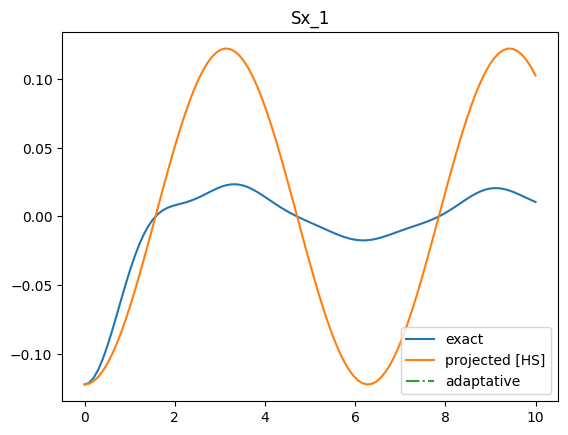

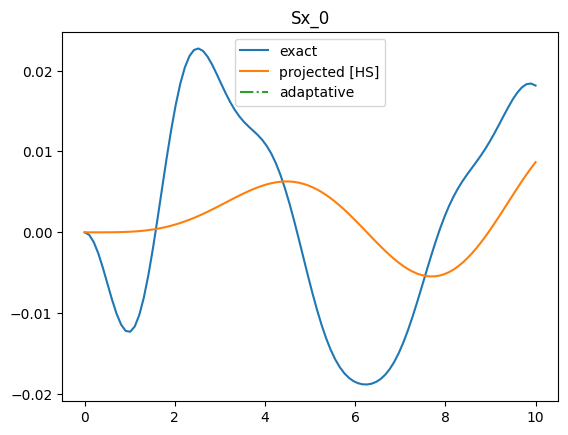

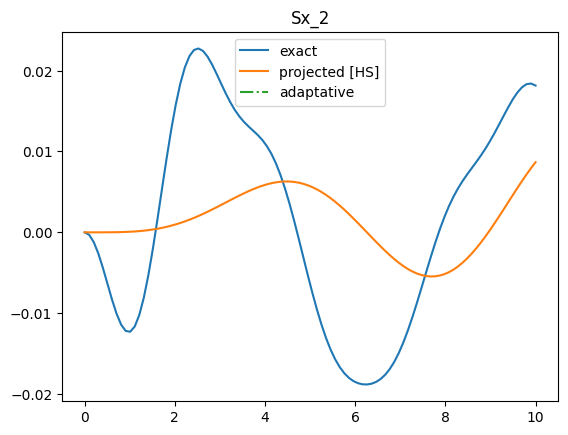

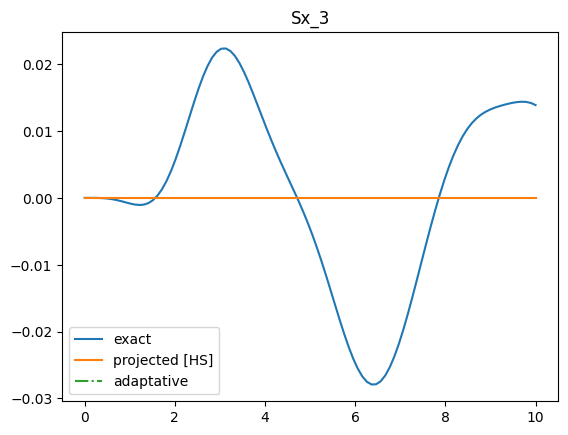

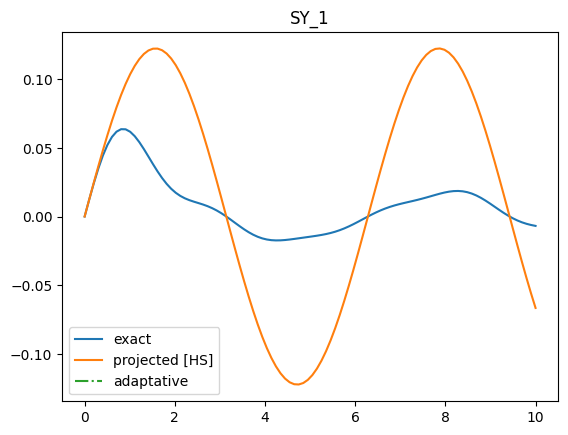

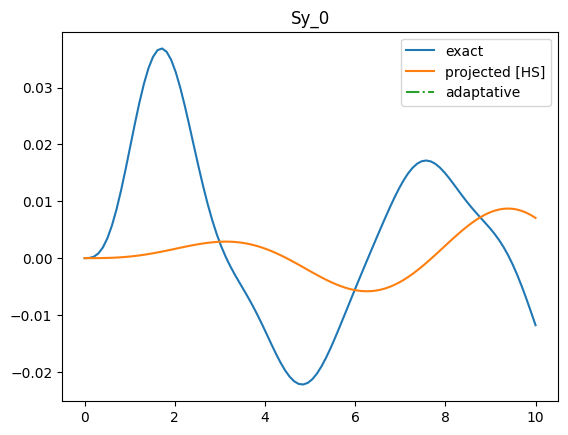

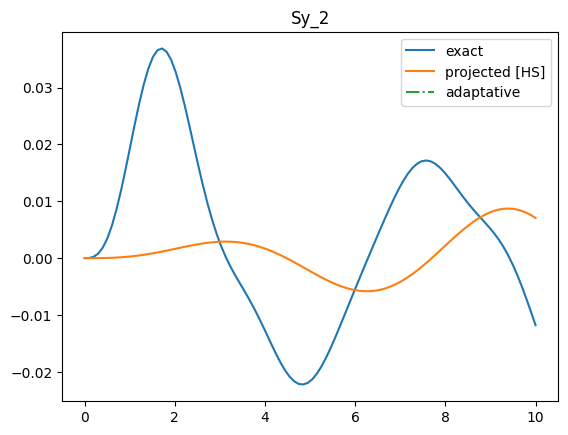

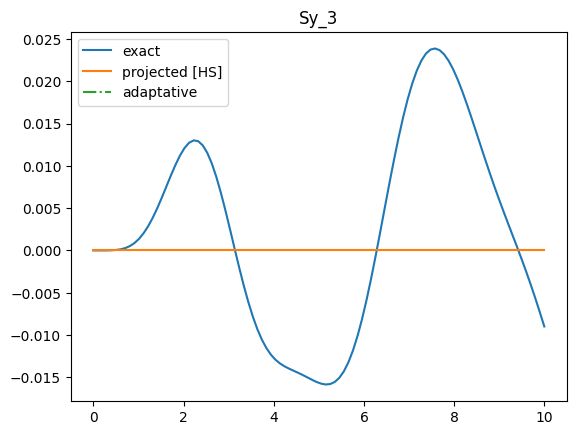

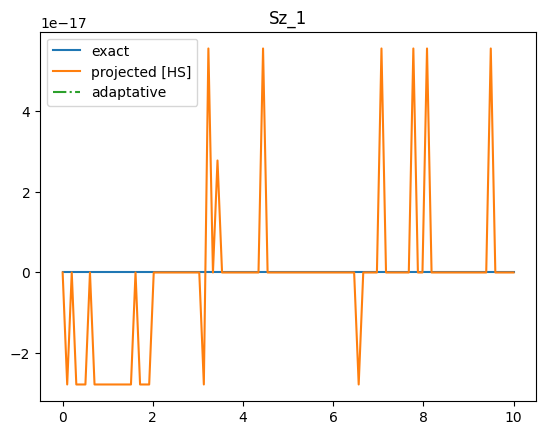

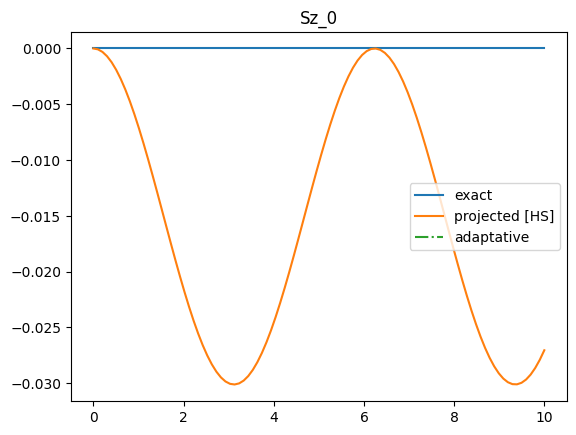

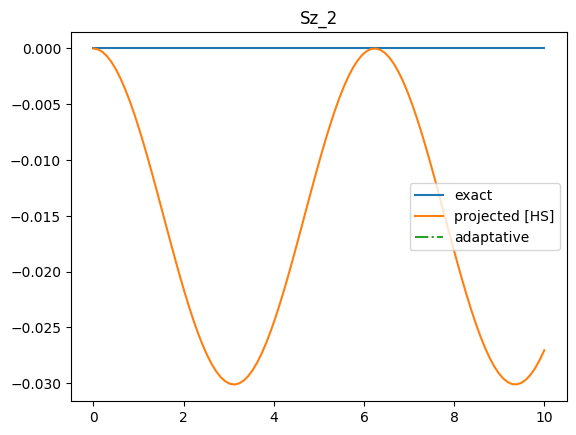

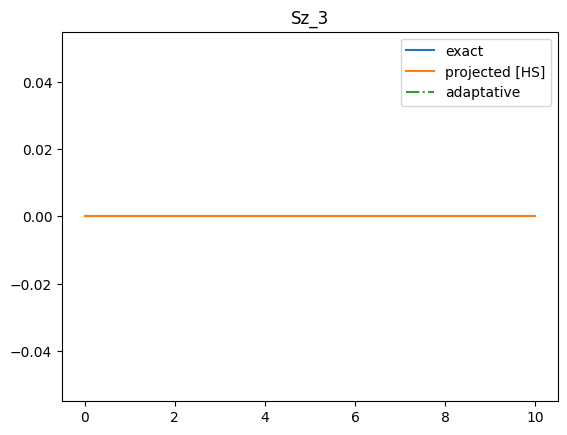

In [6]:
for key in obs:
    plt.plot(TS, result_qutip[key],label="exact")
    plt.plot(TS, result_projected[key],label="projected [HS]")
    plt.plot(TS[:len(result_adaptative[key])], result_adaptative[key],label="adaptative",ls="-.")
    plt.legend()
    plt.title(key)
    plt.show()
    

In [5]:
print("solving projected evolution, covariance sp")
states_projected_evolution = projected_evolution(H, BETA*SX_locals[1], TS, order=10, e_ops=obs, sigma_0=RHO_0)
result_projected = {key:[] for key in obs}
for state_gen in states_projected_evolution:
    for key, val in GibbsProductDensityOperator(state_gen).expect(obs).items():
        result_projected[key].append(val)

solving projected evolution, covariance sp
(0, 1)
(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13)
